# 乳腺癌预测

## 一、目标

### 给定肿瘤细胞的各项特征，预测其是良性/恶性肿瘤

## 二、数据集字段(特征)

**ID**——序号标识

**diagnosis**——肿瘤标识，M/B（M: 恶性, B: 良性）

**radius_mean**——半径平均值

**texture_mean**——纹理平均值

**perimeter_mean**——周长平均值

**area_mean**——面积平均值

**smoothness_mean**——平滑程度平均值

**compactness_mean**——紧密度平均值

**concavity_mean**——凹度平均值

**concave points_mean**——凹缝平均值

**symmetry_mean**——对称性平均值

**fractal_dimension_mean**——分形维数平均值

**radius_se**——半径标准差

**texture_se**——纹理标准差

**perimeter_se**——周长标准差

**area_se**——面积标准差

**smoothness_se**——平滑程度标准差

**compactness_se**——紧密度标准差

**concavity_se**——凹度标准差

**concave points_se**——凹缝标准差

**symmetry_se**——对称性标准差

**fractal_dimension_se**——分形维数标准差

**radius_worst**——半径最大值

**texture_worst**——纹理最大值

**perimeter_worst**——周长最大值

**area_worst**——面积最大值

**smoothness_worst**——平滑程度最大值

**compactness_worst**——紧密度最大值

**concavity_worst**——凹度最大值

**concave points_worst**——凹缝最大值

**symmetry_worst**——对称性最大值

**fractal_dimension_worst**——分形维数最大值

## 三、数据探索 

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("./breast cancer/data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

**可以看出，不存在缺失值！且均为连续数值**

In [4]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [7]:
data.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
23,851509,M,21.160,23.04,137.20,1404.0,0.09428,0.10220,0.10970,0.08632,...,29.17,35.59,188.00,2615.0,0.1401,0.2600,0.31550,0.20090,0.2822,0.07526
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
107,863270,B,12.360,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,...,13.29,27.49,85.56,544.1,0.1184,0.1963,0.19370,0.08442,0.2983,0.07185
273,8910996,B,9.742,15.67,61.50,289.9,0.09037,0.04689,0.01103,0.01407,...,10.75,20.88,68.09,355.2,0.1467,0.0937,0.04043,0.05159,0.2841,0.08175
480,912193,B,12.160,18.03,78.29,455.3,0.09087,0.07838,0.02916,0.01527,...,13.34,27.87,88.83,547.4,0.1208,0.2279,0.16200,0.05690,0.2406,0.07729


**mean，se，worst是对数据的不同表征形式，这里选取mean来做分析**

In [8]:
columns_mean = [
    "id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean",
    "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean",
    "concave points_mean", "symmetry_mean", "fractal_dimension_mean"
]
data_mean = data[columns_mean]

## 四、数据分析&可视化

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["font.sans-serif"] = ["SimHei"]

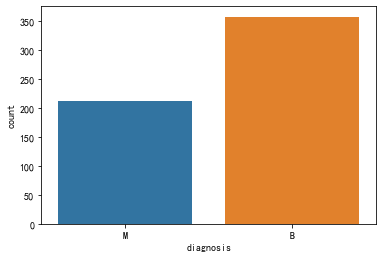

In [10]:
sns.countplot(data_mean["diagnosis"])

**上图展示了恶性（M）、良性（B）肿瘤的分布情况**

In [11]:
data_mean.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [12]:
data_mean["diagnosis_code"] = data_mean["diagnosis"].map({"M": 1, "B": 0})

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**对恶性、良性进行编码，恶性肿瘤编码为1，方便后续分析**

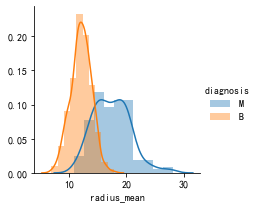

In [13]:
grid = sns.FacetGrid(data=data_mean, hue="diagnosis")
grid.map(sns.distplot, "radius_mean", bins=10)
grid.add_legend()
plt.show()

**上图可以看出，恶性、良性肿瘤在radius_mean上有明显区别，接下来对radius_mean进行分区间分析**

In [14]:
data_mean["radius_mean_band"] = pd.cut(data_mean["radius_mean"], 5)
data_mean[["radius_mean_band", "diagnosis_code"]].groupby(["radius_mean_band"]).mean()

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,diagnosis_code
radius_mean_band,
"(6.96, 11.207]",0.020408
"(11.207, 15.433]",0.194268
"(15.433, 19.658]",0.923810
"(19.658, 23.884]",1.000000
"(23.884, 28.11]",1.000000


**当radius_mean>15.433时，恶性肿瘤的概率超过90%！**

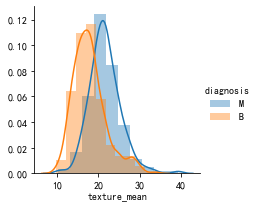

In [15]:
grid = sns.FacetGrid(data=data_mean, hue="diagnosis")
grid.map(sns.distplot, "texture_mean", bins=10)
grid.add_legend()

**上图，恶性、良性肿瘤在texture_mean上有较明显的分别，同样进行分区间分析**

In [16]:
data_mean["texture_mean_band"] = pd.cut(data_mean["texture_mean"], 3)
data_mean[["texture_mean_band", "diagnosis_code"]].groupby(["texture_mean_band"]).mean()

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,diagnosis_code
texture_mean_band,
"(9.68, 19.567]",0.180685
"(19.567, 29.423]",0.621849
"(29.423, 39.28]",0.600000


In [17]:
pd.get_dummies(data_mean["texture_mean_band"], prefix="texture_mean")

,"texture_mean_(9.68, 19.567]","texture_mean_(19.567, 29.423]","texture_mean_(29.423, 39.28]"
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
564,0,1,0
565,0,1,0
566,0,1,0
567,0,1,0


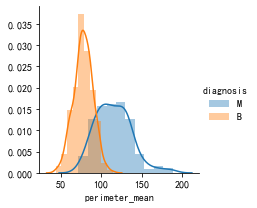

In [18]:
grid = sns.FacetGrid(data=data_mean, hue="diagnosis")
grid.map(sns.distplot, "perimeter_mean", bins=10)
grid.add_legend()

**同样地，在perimeter_mean上，恶性与良性肿瘤也有很明显的差别，分区间分析**

In [19]:
data_mean["perimeter_mean_band"] = pd.cut(data_mean["perimeter_mean"],4)
data_mean[["perimeter_mean_band", "diagnosis_code"]].groupby(["perimeter_mean_band"]).mean()

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,diagnosis_code
perimeter_mean_band,
"(43.645, 79.968]",0.028846
"(79.968, 116.145]",0.410646
"(116.145, 152.322]",1.000000
"(152.322, 188.5]",1.000000


**当perimeter_mean>116.145时，恶性肿瘤的概率是100%**

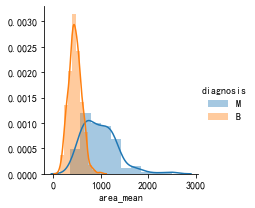

In [20]:
grid = sns.FacetGrid(data=data_mean, hue="diagnosis")
grid.map(sns.distplot, "area_mean", bins=10)
grid.add_legend()

In [21]:
data_mean["area_mean_band"] = pd.cut(data_mean["area_mean"], 4)
data_mean[["area_mean_band", "diagnosis_code"]].groupby(["area_mean_band"]).mean()

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,diagnosis_code
area_mean_band,
"(141.142, 732.875]",0.154964
"(732.875, 1322.25]",0.938462
"(1322.25, 1911.625]",1.000000
"(1911.625, 2501.0]",1.000000


**当area_mean不超过732.875时，是恶性肿瘤的概率只有15%，但超过时，概率直接飙升至93%以上**

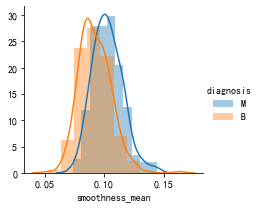

In [22]:
grid = sns.FacetGrid(data=data_mean, hue="diagnosis")
grid.map(sns.distplot, "smoothness_mean", bins=10)
grid.add_legend()

**恶性、良性肿瘤在smoothness_mean上的区分度不是很大**

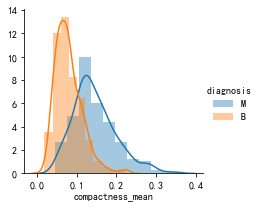

In [23]:
grid = sns.FacetGrid(data=data_mean, hue="diagnosis")
grid.map(sns.distplot, "compactness_mean", bins=10)
grid.add_legend()

**恶性和良性肿瘤在compactness_mean上区分较明显**

In [24]:
data_mean["compactness_mean_band"] = pd.cut(data_mean["compactness_mean"], 4)
data_mean[["compactness_mean_band", "diagnosis_code"]].groupby(["compactness_mean_band"]).mean()

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,diagnosis_code
compactness_mean_band,
"(0.0191, 0.101]",0.120130
"(0.101, 0.182]",0.614286
"(0.182, 0.264]",0.880952
"(0.264, 0.345]",1.000000


**当compactness_mean不超过0.101时，诊断为恶性肿瘤的概率只有12%左右**

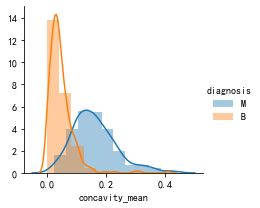

In [25]:
grid = sns.FacetGrid(data=data_mean, hue="diagnosis")
grid.map(sns.distplot, "concavity_mean", bins=10)
grid.add_legend()

**上图可以看出，在concavity_mean上，恶性、良性肿瘤差别明显**

In [26]:
data_mean["concavity_mean_band"] = pd.cut(data_mean["concavity_mean"], 5)
data_mean[["concavity_mean_band", "diagnosis_code"]].groupby(["concavity_mean_band"]).mean()

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,diagnosis_code
concavity_mean_band,
"(-0.000427, 0.0854]",0.076696
"(0.0854, 0.171]",0.738255
"(0.171, 0.256]",0.966102
"(0.256, 0.341]",0.866667
"(0.341, 0.427]",0.857143


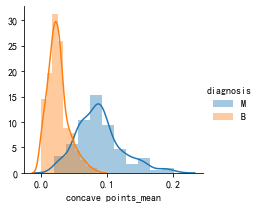

In [27]:
grid = sns.FacetGrid(data=data_mean, hue="diagnosis")
grid.map(sns.distplot, "concave points_mean", bins=10)
grid.add_legend()

**同样地，在concave points_mean上，恶性与良性肿瘤差别十分明显**

In [28]:
data_mean["concave points_mean_band"] = pd.cut(data_mean["concave points_mean"], 4)
data_mean[["concave points_mean_band", "diagnosis_code"]].groupby(["concave points_mean_band"]).mean()

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,diagnosis_code
concave points_mean_band,
"(-0.000201, 0.0503]",0.054913
"(0.0503, 0.101]",0.819277
"(0.101, 0.151]",1.000000
"(0.151, 0.201]",1.000000


**当concave points_mean不超过0.05时，恶性肿瘤的概率只有5%左右，但超过时，恶性肿瘤的概率超过八成！**

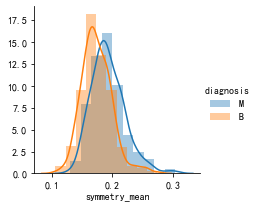

In [29]:
grid = sns.FacetGrid(data=data_mean, hue="diagnosis")
grid.map(sns.distplot, "symmetry_mean", bins=10)
grid.add_legend()

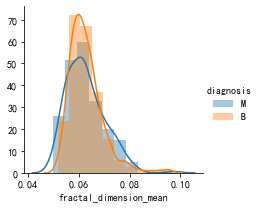

In [30]:
grid = sns.FacetGrid(data=data_mean, hue="diagnosis")
grid.map(sns.distplot, "fractal_dimension_mean", bins=10)
grid.add_legend()

**上两图可以看出，在symmetry_mean和fractal_dimension_mean上，恶性肿瘤和良性肿瘤差别不明显**

## 五、特征选择

In [31]:
data_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 20 columns):
id                          569 non-null int64
diagnosis                   569 non-null object
radius_mean                 569 non-null float64
texture_mean                569 non-null float64
perimeter_mean              569 non-null float64
area_mean                   569 non-null float64
smoothness_mean             569 non-null float64
compactness_mean            569 non-null float64
concavity_mean              569 non-null float64
concave points_mean         569 non-null float64
symmetry_mean               569 non-null float64
fractal_dimension_mean      569 non-null float64
diagnosis_code              569 non-null int64
radius_mean_band            569 non-null category
texture_mean_band           569 non-null category
perimeter_mean_band         569 non-null category
area_mean_band              569 non-null category
compactness_mean_band       569 non-null category
concavity_mea

In [32]:
X = data_mean.drop(columns=["id", "diagnosis", "diagnosis_code"])
y = data_mean["diagnosis_code"]

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
data_clean = [X_train, X_test]

In [36]:
drop_columns = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean",
               "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean"]
for dataset in data_clean:
    dataset.drop(columns=drop_columns, inplace=True)

E:\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 149 to 102
Data columns (total 7 columns):
radius_mean_band            398 non-null category
texture_mean_band           398 non-null category
perimeter_mean_band         398 non-null category
area_mean_band              398 non-null category
compactness_mean_band       398 non-null category
concavity_mean_band         398 non-null category
concave points_mean_band    398 non-null category
dtypes: category(7)
memory usage: 7.3 KB


## 六、编码

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
label = LabelEncoder()
for dataset in data_clean:
    dataset["radius_mean_band_code"] = label.fit_transform(dataset["radius_mean_band"])
    dataset["texture_mean_band_code"] = label.fit_transform(dataset["texture_mean_band"])
    dataset["perimeter_mean_band_code"] = label.fit_transform(dataset["perimeter_mean_band"])
    dataset["area_mean_band_code"] = label.fit_transform(dataset["area_mean_band"])
    dataset["compactness_mean_band_code"] = label.fit_transform(dataset["compactness_mean_band"])
    dataset["concavity_mean_band_code"] = label.fit_transform(dataset["concavity_mean_band"])
    dataset["concave points_mean_band_code"] = label.fit_transform(dataset["concave points_mean_band"])

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [40]:
X_train.head()

,radius_mean_band,texture_mean_band,perimeter_mean_band,area_mean_band,compactness_mean_band,concavity_mean_band,concave points_mean_band,radius_mean_band_code,texture_mean_band_code,perimeter_mean_band_code,area_mean_band_code,compactness_mean_band_code,concavity_mean_band_code,concave points_mean_band_code
149,"(11.207, 15.433]","(9.68, 19.567]","(79.968, 116.145]","(141.142, 732.875]","(0.0191, 0.101]","(-0.000427, 0.0854]","(-0.000201, 0.0503]",1,0,1,0,0,0,0
124,"(11.207, 15.433]","(9.68, 19.567]","(79.968, 116.145]","(141.142, 732.875]","(0.0191, 0.101]","(-0.000427, 0.0854]","(-0.000201, 0.0503]",1,0,1,0,0,0,0
421,"(11.207, 15.433]","(9.68, 19.567]","(79.968, 116.145]","(141.142, 732.875]","(0.182, 0.264]","(0.0854, 0.171]","(0.0503, 0.101]",1,0,1,0,2,1,1
195,"(11.207, 15.433]","(9.68, 19.567]","(79.968, 116.145]","(141.142, 732.875]","(0.0191, 0.101]","(-0.000427, 0.0854]","(-0.000201, 0.0503]",1,0,1,0,0,0,0
545,"(11.207, 15.433]","(19.567, 29.423]","(79.968, 116.145]","(141.142, 732.875]","(0.0191, 0.101]","(-0.000427, 0.0854]","(-0.000201, 0.0503]",1,1,1,0,0,0,0


In [41]:
train_columns = ["radius_mean_band_code", "texture_mean_band_code",  "area_mean_band_code",
                "compactness_mean_band_code", "concavity_mean_band_code"]#, "concave points_mean_band_code"]#"perimeter_mean_band_code",]
data_train = X_train[train_columns]
data_test = X_test[train_columns]

**这里继续选择了特征，根据data_train的heatmap图，将concave points_mean_band_code和perimeter_mean_band_code特征给移除掉**

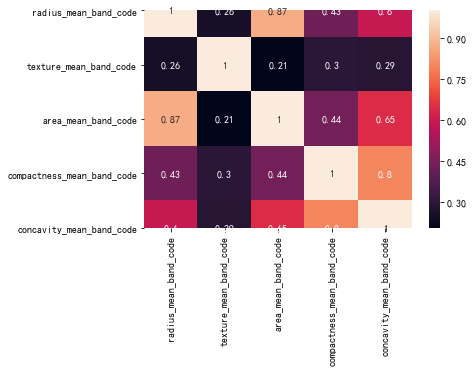

In [42]:
sns.heatmap(data_train.corr(), annot=True)

## 七、构建模型

In [43]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ShuffleSplit

In [44]:
cv_splits = ShuffleSplit(n_splits=10, test_size=0.3, train_size=0.7, random_state=42)

**列表统一比较相关分类算法的性能**

In [45]:
MLA = [
    LinearSVC(),
    SVC(probability=True),
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()
]
MLA_compare = pd.DataFrame(columns=["MLA NAME", "MLA PARAMETERS", "MLA TRAIN ACC MEAN", "MLA TEST ACC MEAN",
                                   "MLA TEST ACC 3*STD", "MLA TIME"])
row_index = 0
for alg in MLA:
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, "MLA NAME"] = MLA_name
    MLA_compare.loc[row_index, "MLA PARAMETERS"] = str(alg.get_params())
    cv_results = cross_validate(alg, data_train, y_train, cv=cv_splits, return_train_score=True)
    MLA_compare.loc[row_index, "MLA TRAIN ACC MEAN"] = np.mean(cv_results["train_score"])
    MLA_compare.loc[row_index, "MLA TEST ACC MEAN"] = np.mean(cv_results["test_score"])
    MLA_compare.loc[row_index, "MLA TEST ACC 3*STD"] = 3*np.std(cv_results["test_score"])
    MLA_compare.loc[row_index, "MLA TIME"] = np.mean(cv_results["fit_time"])
    row_index += 1

E:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 

In [46]:
MLA_compare

,MLA NAME,MLA PARAMETERS,MLA TRAIN ACC MEAN,MLA TEST ACC MEAN,MLA TEST ACC 3*STD,MLA TIME
0,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.910432,0.881667,0.0567891,0.00789449
1,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.91295,0.858333,0.0698212,0.00749483
2,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",0.91223,0.886667,0.0572276,0.0030988
3,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.926619,0.9,0.0968246,0.00279849
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.925899,0.884167,0.0809707,0.0132916
5,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.917986,0.890833,0.0596343,0.0646602
6,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.925899,0.898333,0.0705337,0.0729545
7,XGBClassifier,"{'objective': 'binary:logistic', 'base_score':...",0.92482,0.893333,0.0678233,0.0288815


**上表可以看出，对于单个算法，DecisionTreeClassifier表现最好，接下来利用DecisionTree来预测**

In [47]:
dct = DecisionTreeClassifier()
dct.fit(data_train, y_train)
y_pred = dct.predict(data_test)
print(accuracy_score(y_test, y_pred))

0.9415204678362573


**利用DecisionTree预测准确率达94.15%**

## 八、总结

**对乳腺癌数据集进行了简单的数据分析和挖掘，选取了较有代表性的特征，然后使用了LinearSVC, SVC, LogisticRegression, DecisionTree, RandomForest, AdaBoostClassifier, GradientBoostClassifier, XGBClassifier来对乳腺癌进行预测，经过比较，选择了交叉验证表现最优的DecisionTree进行预测，最后预测准确率达94.15%**